# Analiza plezalnih vzponov v slovenskih plezališčih

## Zajemanje podatkov
Javascript na strani 8a.nu/ascents glede na zahtevane parametre vrne urejen JSON zadnjih 10.000 vzponov v Sloveniji. Žal to ni dovolj za dobro analizo, saj podatki ne sežejo dlje od leta 2018. Zato sem podatke dobil na nasilen način.

### Zajete spletne strani in [regex](https://en.wikipedia.org/wiki/Inferno_(Dante)#Ninth_Circle_(Treachery))

- [Seznam plezališč](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/data/plezalisca.json) sem pridobil s funkcijama [`vsa_slovenska_plezalisca_in_balvanisca()`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/nalozi_podatke.py#L13) in [`strik_v_json`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/parse_plezalisca.py#L13).
- Za vsako plezališče sem pridobil [html datoteko](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/data/vzponi_bohinjska-bela.html) z uporabo funkcije [`vsi_vzponi_v_plezaliscih()`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/nalozi_podatke.py#L34) in izluščil podatke s pomočjo demonov, ki jih prikliče [`vzponi_strik_v_json_csv()`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/parse_plezalisca.py#L72).

Urejeni podatki so shranjeni v datoteki [vzponi_strik.csv](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/data/vzponi_strik.csv).


# Analiza
## Priprava podatkov
Pripravimo vse tabele, ker itak nimam več pojma kaj je kej. TODO

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 10)
vzponi = pd.read_csv('data/vzponi.csv', index_col='id') # vsi podatki
plezalci = pd.read_csv('data/plezalci.csv', index_col='id') # plezalci - id 
smeri = pd.read_csv('data/smeri.csv', index_col='id') # smer - id
plezalisca = pd.read_csv('data/plezalisca.csv', index_col='id')  # plezalisce - id
smeri_s_plezalisci = pd.read_csv('data/smeri_plezalisca.csv', index_col='id') # smer + plezalisce (lep groupby)
vzponi

,uporabnik,plezalec,plezalisce,smer,tezavnost,ocena,poskusi,datum,opomba,komentar
id,,,,,,,,,,
0,linda-okoren,Linda Okoren,osp-misja-pec,Kopfüber,5a,5a,redpoint,11/01/2020,NaN,NaN
1,tina-bercic,Tina Bercic,osp-misja-pec,Danger zone,7a+,7a,redpoint,11/01/2020,NaN,NaN
2,tina-bercic,Tina Bercic,osp-misja-pec,Hugolina,7b+,7b+,redpoint,11/01/2020,NaN,NaN
3,linda-okoren,Linda Okoren,osp-misja-pec,Cebelica Maja,4a,3b+,toprope,11/01/2020,NaN,NaN
4,linda-okoren,Linda Okoren,osp-misja-pec,Maeva,4b,4b,toprope,11/01/2020,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
38682,rupert-schindler,Rupert Schindler,vrsic,Stelutis,6c,6c,onsight,08/13/2011,NaN,"3 Pitches, 6b+, 6a, 6c, all OS"
38683,rupert-schindler,Rupert Schindler,vrsic,Luna Magnus,6b+,6b+,onsight,08/05/2011,NaN,NaN
38684,rupert-schindler,Rupert Schindler,vrsic,Caramba,6c,6c,onsight,08/05/2011,NaN,NaN


## Osnovni rezultati

### Velikosti plezališč
Mera za velikost naj bo število smeri. Primerjava z realnim stanjem izkazuje krhkost rezultatov. V resnici je v Dovžanovi soteski namesto 42 kar 50 smeri, v Kamnitniku pa, po podatnik vodnička iz 2017, le 38. [8a.nu](https://www.8a.nu/) je uporabniško grajena spletna stran, zato prihaja do raznih tipkarskih in drugih napak, ki povzročijo odstopanja. Slaba kvaliteta vodničkov na strani pa ne vpliva na analizo, le zavedati se je treba, da analiziramo le vzpone, zabeležene na 8a.nu. Verjetno so vse številke v lokalnih plezališčih za kakšen faktor višje (V Tržiču je uporaba portala nezaželjena.).

Dovžanova soteska:  42 
Kamnitnik:  59


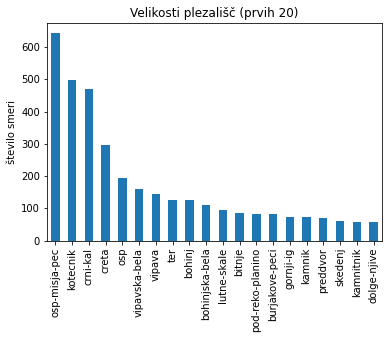

In [2]:
smeri_plezalisca = pd.merge(smeri, plezalisca,left_index=True, right_index=True)[['smer', 'plezalisce']].drop_duplicates()
smeri_plezalisca.groupby('plezalisce').size().sort_values(ascending=False).head(20).plot.bar(title='Velikosti plezališč (prvih 20)', xlabel='', ylabel="število smeri")
print('Dovžanova soteska: ' , len( smeri_plezalisca[smeri_plezalisca['plezalisce'] == 'dovzanova-soteska']) , '\nKamnitnik: ', len(smeri_plezalisca[smeri_plezalisca['plezalisce'] == 'kamnitnik']))

### Najbolj obiskana plezališča in  smeri
Velikosti posameznih plezališč sovpadajo z obiskanostjo. Poleg primorske je blazno obiskan še Kotečnik.

<AxesSubplot:title={'center':'Obiskanost plezališč'}, ylabel='število vzponov'>

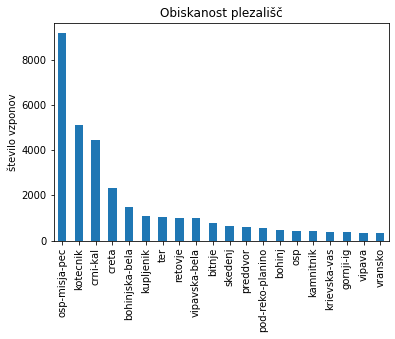

In [3]:
# neberljiva koda goes brrr
# obiskanost plezališč
plezalisca.groupby('plezalisce').size().sort_values(ascending=False).head(20).plot.bar(title='Obiskanost plezališč', xlabel='', ylabel="število vzponov")

<AxesSubplot:title={'center':'Najbolj plezane smeri'}>

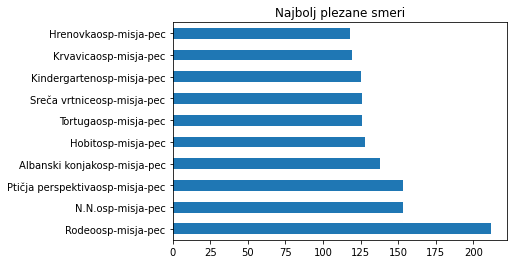

In [4]:
# najbolj plezane smeri
smeri_s_plezalisci.groupby('smer-plezalisce').size().sort_values(ascending=False).head(10).plot.barh(title='Najbolj plezane smeri', xlabel='', ylabel="število vzponov")

## Filozofi
Poiščimo ljudi, ki pišejo najdaljše komentarje.

<AxesSubplot:title={'center':'Skupne dolžine komentarjev'}>

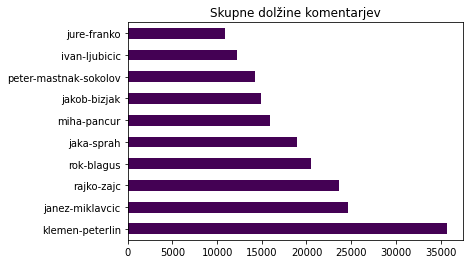

In [5]:
# poberemo samo tiste vzponi, kejr komentar ni prazen
komentarji = vzponi[vzponi['komentar'] == vzponi['komentar']]
# gledamo je uporabnika in komentar
komentarji = komentarji[['uporabnik', 'plezalec', 'komentar']]
# dodam stolpec z dolžino
komentarji['dolzina']  = komentarji['komentar'].apply(len)
# dolzine komentarjev
dolzine = komentarji[['uporabnik', 'dolzina']]
dolzine.groupby('uporabnik').sum().sort_values(by='dolzina', ascending= False).head(10).plot.barh(title='Skupne dolžine komentarjev',legend=False, xlabel='', colormap='viridis')

Bolj realno oceno povedo povprečja. Da upoštevamo samo redne plezalce v mišji peči, gledamo samo tiste, ki so spisali vsaj 50 komentarjev.

Število upoštevanih komentatorjev:  39


<AxesSubplot:title={'center':'Povprečne dolžine komentarjev'}>

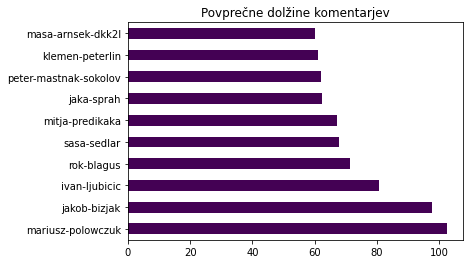

In [6]:
# konstanta, s katero priredim statistično analizo tako, da mi je všeč
minimalno_število_komentarjev = 50

# združim komentarje po uporabnikih
komentarji_na_uporabnika = komentarji.groupby('uporabnik').size().to_frame(name="stevilo")

# uporabniki, ki so zadostkrat komentirali
verodostojni_filozofi = komentarji_na_uporabnika[komentarji_na_uporabnika['stevilo'] > minimalno_število_komentarjev]
verodostojni_filozofi.reset_index(level=0, inplace=True)
verodostojni_filozofi = verodostojni_filozofi['uporabnik'].values #numpy array of str

print('Število upoštevanih komentatorjev: ', len(verodostojni_filozofi))

# dobim tabelo verodostojnih filozofov in dolzin
dolzine.set_index('uporabnik', inplace=True)
ustrezne_dolzine = dolzine.loc[verodostojni_filozofi] # dataframe verodostojen_uporabnik : dolzina

# pogropiram po imenu in povprečim
ustrezne_dolzine.groupby('uporabnik').mean().sort_values(by='dolzina', ascending= False).head(10).plot.barh(title='Povprečne dolžine komentarjev',legend=False, xlabel='', colormap='viridis')


### Oddaljenost od prestolnice
Ročno lahko pogledamo še oddaljensot filozofov od glavnega mesta Slovenije.

## Analiza težavnosti
V tem poglavju bom analiziral razlike med težavnostmi in zasoljenosti ocen v posameznih plezališčih.

### Povprečne ocene
Stran 8a.nu za vsak vzpon zabeleži oceno, ki jo je predlagal uporabnik. Ocena iste smeri se tako razlikuje v različnih vzponih. Zato sem poleg težavnosti (posameznikova ocena) definiral še povprečno oceno vsake smeri (polje *ocena*).

In [10]:
smeri_in_tezavnosti = vzponi[['smer', 'tezavnost', 'ocena']]
print(smeri_in_tezavnosti[smeri_in_tezavnosti['smer']=='Divja oma'])
del smeri_in_tezavnosti

            smer tezavnost ocena
id                              
10154  Divja oma        8a   8a+
10892  Divja oma       8a+   8a+
11366  Divja oma       8a+   8a+
12972  Divja oma       8a+   8a+
13397  Divja oma       8a+   8a+
14031  Divja oma        8a   8a+


### Najtežje smeri v sloveniji
Katere smeri so najtežje v Sloveniji?

In [12]:
# Glej funcijo:
# ogrodja.ocene()
ocene = ['1a', '1a+', '1b', '1b+', '1c', '1c+', '2a', '2a+', '2b', '2b+', '2c', '2c+', '3a', '3a+', '3b', '3b+', '3c', '3c+', '4a', '4a+', '4b', '4b+', '4c', '4c+', '5a', '5a+', '5b', '5b+', '5c', '5c+', '6a', '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+', '7b', '7b+', '7c', '7c+', '8a', '8a+', '8b', '8b+', '8c', '8c+', '9a', '9a+'] #, '9b', '9b+', '9c', '9c+']

# matplotlib potrebuje numerične parametre, da lahko
# nariše graf. Zato ocene pretvorimo v cela števila

#Funckija za vrednotenje ocen:
def ocena_v_int(ocena):
    if ocena in ocene:
        return ocene.index(ocena)
    # Lahke smeri nas ne zanimajo (in smeri z oceno 1a v resnici ne obstajajo)
    # Zato lahko vse napake v podatkih slikam v '1a'
    return 0
        
def int_v_oceno(x):
    return ocene[x]


Za nadaljno analizo bo pomembno, katera plezališča imajo težke smeri. Poglejmo najtežje ocene v posameznih plezališčih.

Text(0.5, 1.0, 'Najvišje ocene v plezališčih')

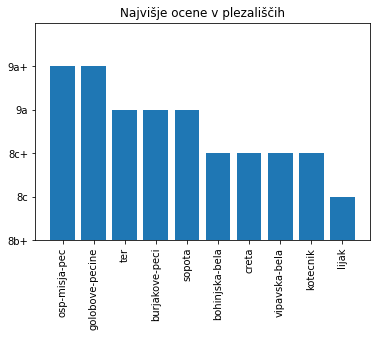

In [13]:
# funckija, ki iz tabele izbeza maximalno oceno
def max_ocena(df):
    df = df['ocena'].apply(ocena_v_int)
    return df.max()
    
# tabela plezališč in največjih ocen v njem
najvecje_ocene = vzponi.groupby('plezalisce').apply(max_ocena).sort_values(ascending=False).head(10).to_frame(name="numericna")

# doda plezalisce kot stolpec
najvecje_ocene.reset_index(inplace=True)


# popravljena skala za lepši graf
zamik = najvecje_ocene['numericna'].min() - 1
najvecje_ocene['numericna']-= zamik
ocene_na_grafu = ocene[zamik:]
# print(ocene_na_grafu)
# print(najvecje_ocene)


# https://stackoverflow.com/questions/66093970/pandas-plotting-bar-plot-non-numerical-data/66097436#66097436
# open figure
fig, ax = plt.subplots()
# ensure limits
ax.set_ylim([0,len(ocene_na_grafu)])
ax.bar( x=najvecje_ocene['plezalisce'], height=najvecje_ocene['numericna'] )
# ensure limits
ax.set_ylim([0,len(ocene_na_grafu)])
# set ticks
ax.set_yticks( list(range(len(ocene_na_grafu))) )
plt.xticks(rotation=90)
# set tick labels
ax.set_yticklabels( ocene_na_grafu )
plt.title('Najvišje ocene v plezališčih')



Za kvaliteten trening je pa bolj od maksimalnosti pomambna raznolikost dovolj težkih smeri. Glejmo število smeri z oceno vsaj 8a.

<AxesSubplot:title={'center':'Število smeri nad 8a'}>

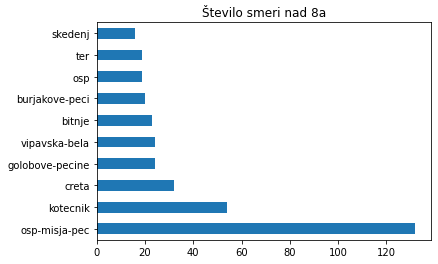

In [24]:
meja = ocena_v_int('8a') # poglej me

def st_tezkih_smeri(df):
    # da ne stejem smeri dvojno
    df = df[['ocena', 'smer']].drop_duplicates()
    # print(df[df['smer']=='Divja oma'])
    smeri = df['ocena'].apply(ocena_v_int).to_frame(name='num')
    tezke_smeri = smeri[smeri['num'] >= meja]
    return len(tezke_smeri)
    


vzponi.groupby('plezalisce').apply(st_tezkih_smeri).sort_values(ascending=False).head(10).plot.barh(title='Število smeri nad 8a', xlabel='')

## Časovna obremenjenost plezališč


## Najboljši plezalci